## Final Project Submission

Please fill out:
* Student name: 
* Student pace: Full time
* Scheduled project review date/time: 17/04/2023 - 21/04/2023
* Instructor name: Antonny Muiko
* Blog post URL: 


### TItle: Predicting Home Sale Prices in King County.

**Explanation**
> * This project aims to predict the sale price of homes in King County, based on various features such as the number of bedrooms, bathrooms, square footage, and location. The goal is to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

### Overview
This projects aims to analyze factors affecting house price in King County. Some of these factors are; location, year of construction, size, renovations done and many more. This would greatly help the agency get insights on how to cut down the costs and maximize the profit. 

### Business Problem
Our stakeholder is homeowners who are looking to renovate their homes and want to estimate the impact of these renovations on the value of their home. Our business problem is to identify which home features are most important in determining a home's sale price and estimate how much value can be added by improving these features.

In [19]:
# Import the required libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use('ggplot')

### Load the dataset into a data frame

In [20]:
# load the data into a data frame
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [21]:
rows, columns = df.shape
print(f'Nrows: {rows}, Ncolumns: {columns}')


Nrows: 21597, Ncolumns: 21


In [22]:
cols = df.columns
cols

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Data Understanding
The data used in this project is the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder. The dataset contains 21,597 records and 21 columns. The description of the column names can be found in column_names.md in the same folder. It contains 21 columns with each being either numerical or categorical data.

### Data processing
We will start by cleaning the data and handling missing values, if any. We will also convert some of the columns into the appropriate data type.

In [23]:
def missing_values(data):

    # Columns with null values
    null_cols = data.columns[data.isna().any()]

    # Count null values in each column and sort in descending order
    count_null = data[null_cols].isna().sum().sort_values(ascending=False)

    # print the null column and the count
    for col, count in zip(null_cols, count_null):
        print(f'The {col} has {round(count/len(data)*100, 2)} % of the data missing')

missing_values(df)

The waterfront has 17.79 % of the data missing
The view has 11.0 % of the data missing
The yr_renovated has 0.29 % of the data missing


In [24]:
def duplicates(data=df, unique_id = 'id'):
    # Check for duplicates
    duplicates = data[unique_id].duplicated().sum()
    # duplicates = df.id.duplicated().sum()
    print(f'The duplicated values are: {duplicates}')
    print(f'Which translates into {round(duplicates/len(data) * 100, 2)}% of the total data.')

    # Drop duplicated values:
    data.drop_duplicates(subset=unique_id, keep='last', inplace=True)

duplicates(df, 'id')



The duplicated values are: 177
Which translates into 0.82% of the total data.


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     19067 non-null  object 
 9   view           21357 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   17607 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

### Dealing with numerical variables.
* We convert the date columns to dates
* we convert sqft_basement to float

**Dealing with the date columns**
* To be able to use the date columns we have to convert them into either and int or a datetime data type. The ```date``` column has been converted into ```datetime``` using the ```pd.datetime()``` function. The ```yr_renovated``` column which might be of help has been converted to datatype ```int```

In [26]:
df['date'] = pd.to_datetime(df['date']).dt.year
df['yr_renovated'] = df['yr_renovated'].fillna(0).astype(int)

**Deal with obect column. i.e sqft_basement**

We need to convert it from obect to integer since it's an area


In [27]:
df['sqft_basement'] = df['sqft_basement'].str.replace("?", '0').astype(float)

C:\Users\Daniel Ekale\AppData\Local\Temp\ipykernel_10208\1749144940.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['sqft_basement'] = df['sqft_basement'].str.replace("?", '0').astype(float)


**Numerical Variables**

In [28]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062


**Categorical Variables**

In [29]:
df_categorical = df.select_dtypes(include=np.object_)
df_categorical

,waterfront,view,condition,grade
0,NaN,NONE,Average,7 Average
1,NO,NONE,Average,7 Average
2,NO,NONE,Average,6 Low Average
3,NO,NONE,Very Good,7 Average
4,NO,NONE,Average,8 Good
...,...,...,...,...
21592,NO,NONE,Average,8 Good
21593,NO,NONE,Average,8 Good
21594,NO,NONE,Average,7 Average
21595,NaN,NONE,Average,8 Good


### Data Analysis
We can start by having a look at the summary statistics of all the numerical variables. The ```describe()``` function in pandas enables us implement this concent easily.

In [30]:
df.drop('id', axis=1).describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,2014.325257,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,1791.170215,285.937021,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,0.468482,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,828.692965,440.012962,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867
min,2014.000000,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2014.000000,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,2014.000000,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,2015.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,2220.000000,550.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,2015.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


**Interpretation**
* From the table we can see the measures of central tendency like the mean, mode, mdeian and quartiles of various variables. We can also see the variability of the data by observing the standard deviations and the range.
* The mean for ```price``` variable is 5.418614e+05, the minimum being 7.8e+04 and the maximum price is 7.7e+06.

**Mean price of houses in respect to grade**


<Axes: title={'center': 'Grading'}, xlabel='grade'>

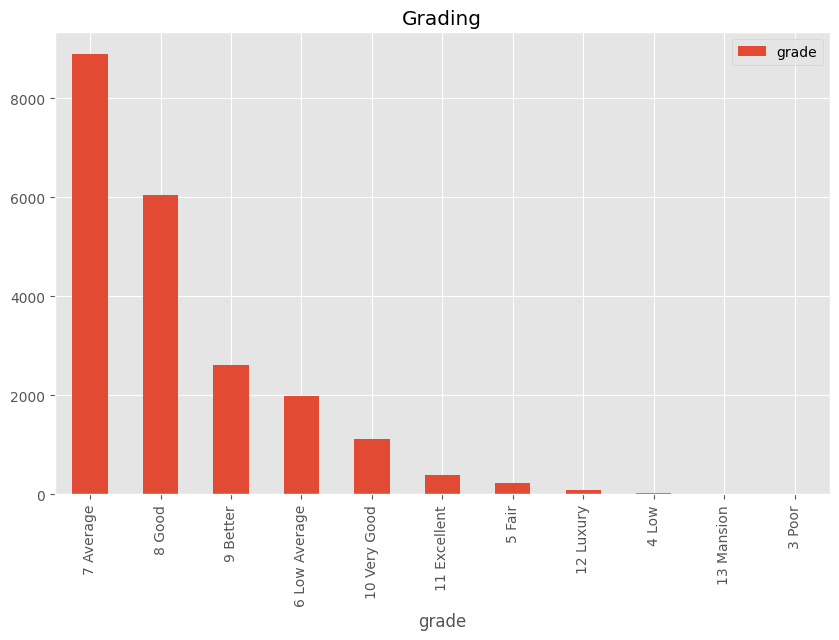

In [31]:
grouped = df.groupby('grade')['grade'].count().sort_values(ascending=False)
df_grouped = pd.DataFrame(grouped)
df_grouped.plot(kind='bar', title='Grading',figsize=(10,6))

> * We can see that average prices for the houses differ depending on grade. In the above plot we can see that houses that had the highest average prices are Average, Good, Better in that order. The least being the one with poor grade.

In [32]:
df['grade_number'] = df['grade'].str.split('',expand=True)[1].astype(int)

### Analyzing how the age of a house affects the prices
Age of the house = Year in which the house was sold - The year in which it was built
 

<Axes: title={'center': 'Age vs Price'}, xlabel='age', ylabel='price'>

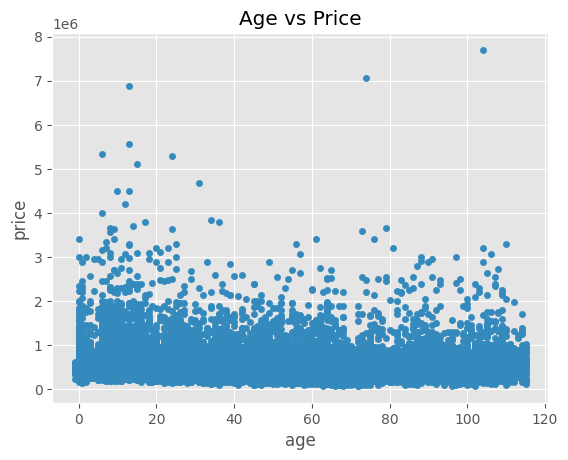

In [33]:
df['age'] = df['date'] - df['yr_built']
df.plot(kind='scatter', x='age', y='price', title='Age vs Price')


* From the above scatter plot we can observe that the distribution is somehow uniform, indicating that there is not much effect between the age and price.

### Distribution analysis and plots
**Univariate analysis**

Let us start by analyzing the distribution of the price variable.

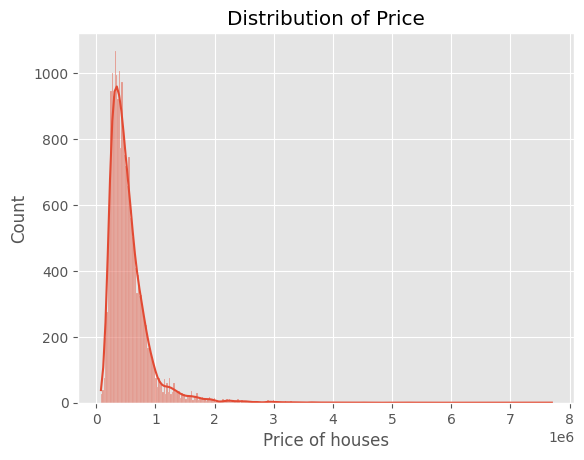

In [34]:
#plot the distribution of the target variable
sns.histplot(df.price, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price of houses')
plt.ylabel('Count')
plt.show()

**Interpretions**
* The price distribution is positively skewed, which means there are more houses with lower price than higher price. 


### Skewness


In [35]:
skewness = df.select_dtypes(include=np.number).skew().sort_values(ascending=False)
skewness_results = pd.DataFrame(skewness)
skewness_results


,0
sqft_lot,13.056252
sqft_lot15,9.513045
yr_renovated,5.098099
price,4.035379
bedrooms,2.039982
sqft_basement,1.604163
sqft_living,1.472702
sqft_above,1.445001
sqft_living15,1.104531
long,0.881755


In [36]:
df_cat = df.select_dtypes(include=np.object_)
df_cat.drop(['sqft_basement'], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_cat_lbl = df_cat.apply(le.fit_transform)
cat = pd.DataFrame(data_cat_lbl)
cat

KeyError: "['sqft_basement'] not found in axis"

In [ ]:
cat.grade.value_counts()

8     8889
9     6041
10    2606
7     1995
0     1130
1      396
6      234
2       88
5       27
3       13
4        1
Name: grade, dtype: int64

In [ ]:
df.grade.value_counts()

7 Average        8889
8 Good           6041
9 Better         2606
6 Low Average    1995
10 Very Good     1130
11 Excellent      396
5 Fair            234
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

<Axes: xlabel='view'>

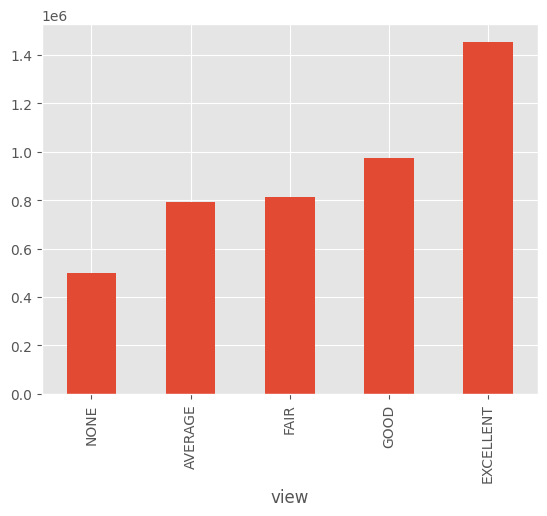

In [ ]:
grp = df.groupby('view')['price'].mean().sort_values(ascending=True)
grp.plot(kind='bar')

In [ ]:
df['price_transf'] = np.log(df['price'])

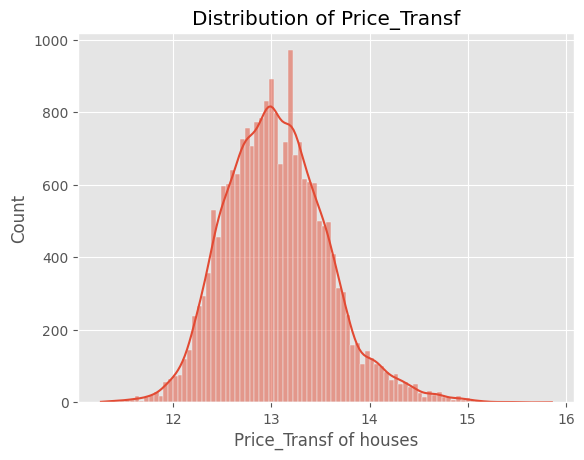

In [ ]:
sns.histplot(df.price_transf, kde=True)
plt.title('Distribution of Price_Transf')
plt.xlabel('Price_Transf of houses')
plt.ylabel('Count')
plt.show()

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'grade_number', 'age',
       'price_transf'],
      dtype='object')

**Correlation Matrix Plot**

In order to examine the correlation between the numeric variables and the target variable-price, we found it useful to display the information using a correlation heatmap.

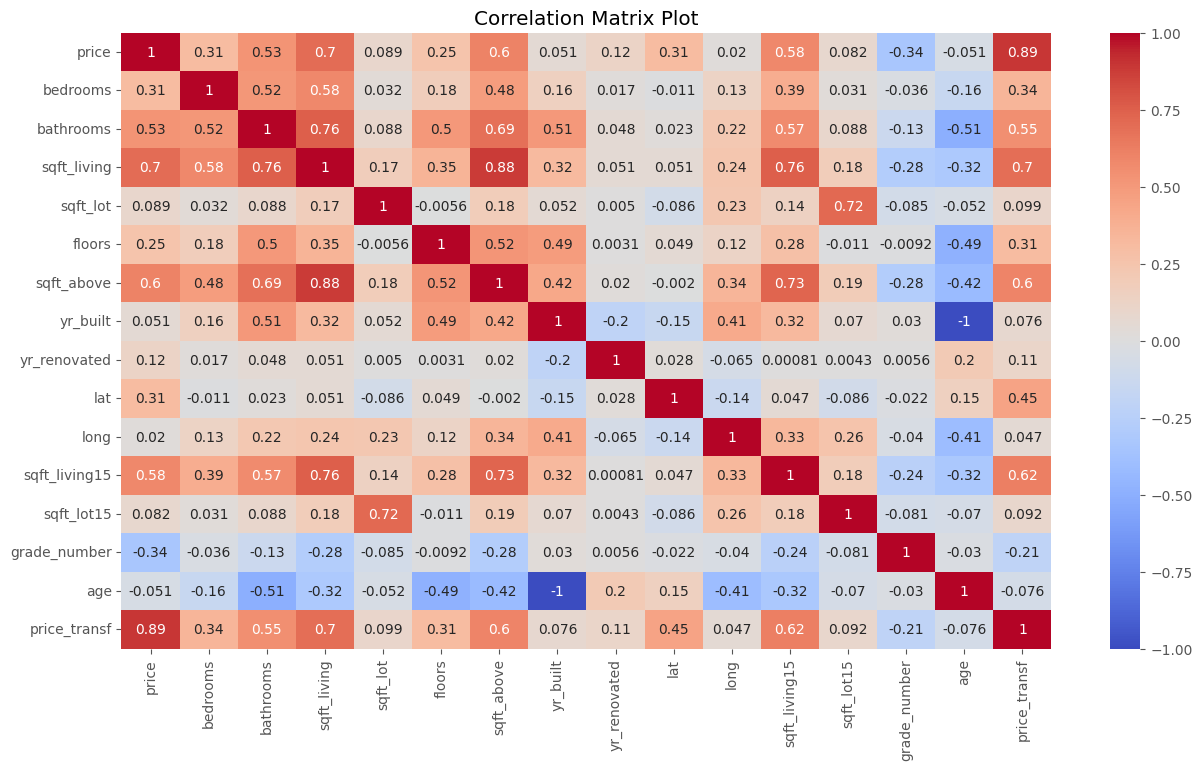

In [ ]:
df_corr = df.drop(['date','id','zipcode'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Plot')
plt.show()

**Interpretation**
* From the above correlation matrix plot, We can see that numerical variables that have a higher correlation with price are; ```sqft_living```, ```sqft_above```, ```sqft_living15```,```bathrooms```, and  ```bedrooms```.
* We can also see that the variables with a weak positive correletion to price are ```sqft_lot```, ```sqft_lot15```, and ```yr_built```.

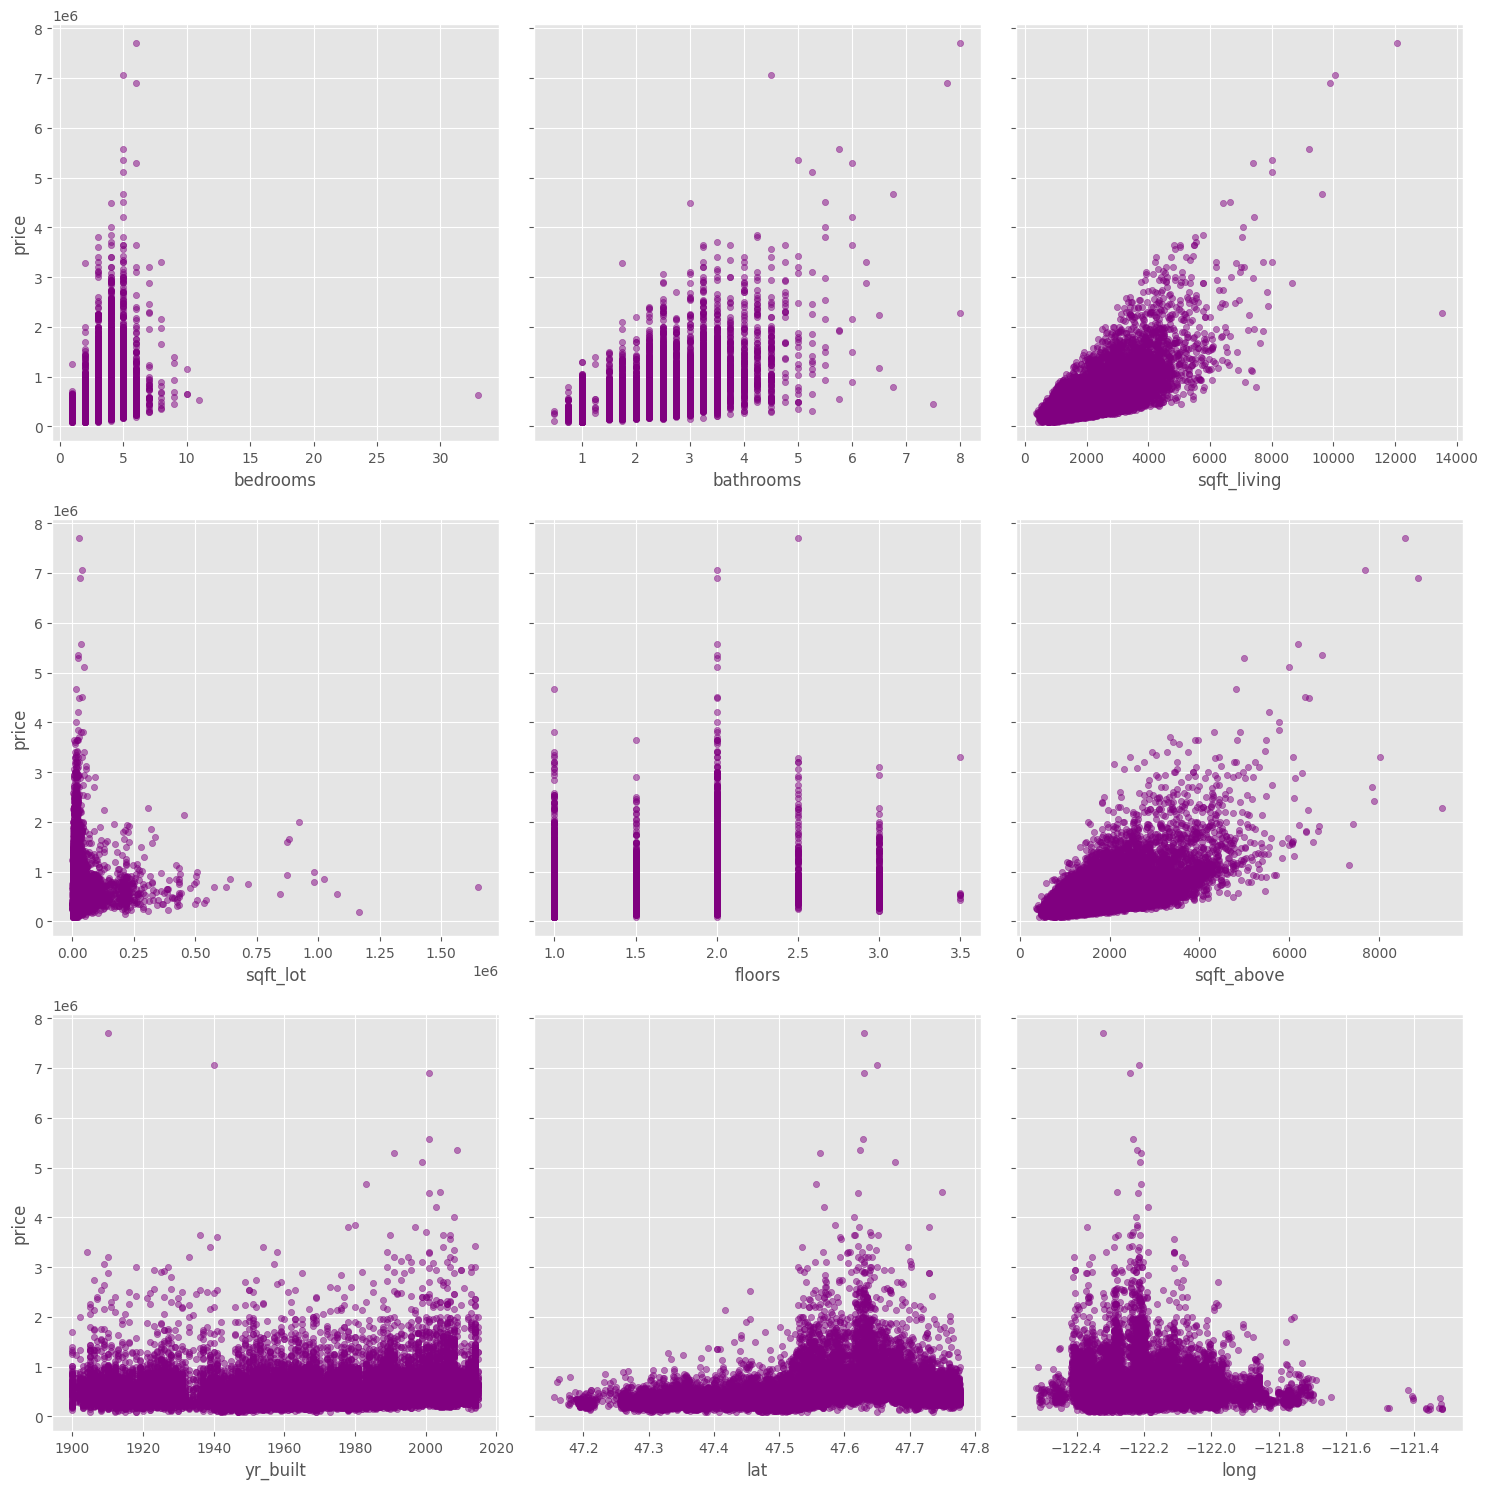

In [ ]:
#
fig = plt.figure(figsize=(18,10))

axes = fig.subplots(nrows=3, ncols=3, sharey=True)

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors',
       'sqft_above', 'yr_built', 'lat', 'long'], axes.flatten()):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.5, color='purple', figsize=(15,15))
    
plt.tight_layout()
plt.show()

### simple linear regression
We can perform a regression analysis for the variable that had the highest correlation.


**Using stats models**

In [ ]:
#function to perform regression
def model(data, y, x):
    '''This fucntion takes three arguments and prints the regressions summary table'''
    formula = y + '~' + x
    results = smf.ols(formula, data).fit()
    return print(results.summary())


In [ ]:
model(df, 'price', 'sqft_living')


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.073e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:03:34   Log-Likelihood:            -2.9763e+05
No. Observations:               21420   AIC:                         5.953e+05
Df Residuals:                   21418   BIC:                         5.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.255e+04   4436.470     -9.591      

**using sklearn**

In [ ]:
X = df[['sqft_living']]
Y = df['price']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=1234)

#fitting the train dataset into model
linear_reg_model = LinearRegression().fit(x_train, y_train)

pred_results_linear =linear_reg_model.predict(x_test)
pred_results_linear

array([ 573179.4830725 ,  664732.98920932,  401169.8654821 , ...,
        501046.41763137,  304067.66200366, 1019849.61907336])

In [ ]:
print(f'The coefficient is: {linear_reg_model.coef_}')
print(f'The Intercept is: {linear_reg_model.intercept_}')

The coefficient is: [277.43486708]
The Intercept is: -37177.22450631752


* Using these predictions, we can check the accuracy of the model:


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print('R_squared score is:', r2_score(pred_results_linear, y_test))
print('MSE is:', mean_squared_error(pred_results_linear, y_test))


R_squared score is: -0.05389851541257573
MSE is: 69661421924.96642


### Multiple linear regression
We will perform regression analysis on variable that are more likely to be used as the predictor variables for our target variable. This will help us see what effect is produced by a certain change of the predictor variable. To determine which variables are statistical significant we can use the p_value approach where the variables with a p-value greater than 0.05 (if we have considered a confidence interval of 95%) are the unimportant ones and can be removed from the model.

There are also other approches to this. For example, Ridge Lasso or Elastic Net which penalize variables based on their importance in the model.

In [ ]:
# clean the value of X to use by dropping unnecessary columns
df_numeric = df.select_dtypes(include=np.number)
X = df_numeric.drop(['id','price','zipcode','price_transf'], axis=1)
Y = df['price']

#split our dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=1234)

#Initializing the algorithm and fitting our model
linear_model = LinearRegression().fit(x_train,y_train)

In [ ]:
#Predicting the results
pred_results_multiple =linear_model.predict(x_test)
result_df = pd.DataFrame(data={'price': pred_results_multiple})
result_df

,price
0,753344.970090
1,769841.425128
2,319010.778254
3,793592.157324
4,939840.016937
...,...
4279,780661.592829
4280,289480.691089
4281,342763.364361
4282,459918.516304


In [ ]:
#Checking the performance
print('R_squared score is:', r2_score(pred_results_multiple, y_test))
print('MSE is:', mean_squared_error(pred_results_multiple, y_test))


R_squared score is: 0.414517998455895
MSE is: 50819549190.90904


In [ ]:
x = 'bedrooms + bathrooms + sqft_living + sqft_lot + floors	+ sqft_above + yr_built	+ yr_renovated + lat + long + sqft_living15 + sqft_lot15 + grade_number + age'
model(df_numeric, 'price', x)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     2899.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:03:36   Log-Likelihood:            -2.9401e+05
No. Observations:               21420   AIC:                         5.880e+05
Df Residuals:                   21406   BIC:                         5.882e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -28.7660      0.859    -33.479

### Project Outline
* Introduction
> * Title
> * Explanation
* Business Problem
* Data Understanding
* Data processing
* Data analysis
> * Statistical tests and distributions
> * Visualizations
* Modeling
> * Linear regression
> * Multiple regression
* Interpretations and Recommendations
* Conclusion